In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b= 0.023
zR = b / 2     # [m] Rayleigh Range
omega0 = np.sqrt(lambda_355 * zR / np.pi) # [m] Beam radius at the focus
PXe = 25

pulse_params = {'b' : b,            # [m] confocal parameter
            'zR' : zR,           # [m] Rayleigh range
            'omega0' : omega0,   # [m] beam waist at focus
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9}     # [s] single pulse length

harm_params = {'sigma' : 1.5e-50,
            'chi3' : 1.5e-35,
            'PXe' : PXe}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

sol_params = {'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z}


params = {**pulse_params, **harm_params, **sol_params}
initial_vals = (nonzero, nonzero)

rstop = 5*omega0
r = np.linspace(0,rstop,10,dtype = np.longdouble)



sol = solve_diff_eq(dA118_dz_GBNA,params,zrange, initial_vals,z,r)


    

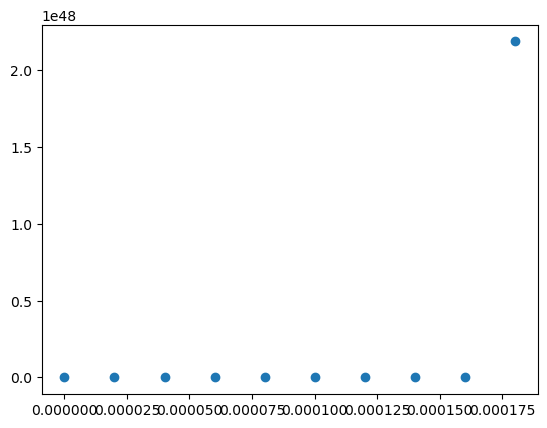

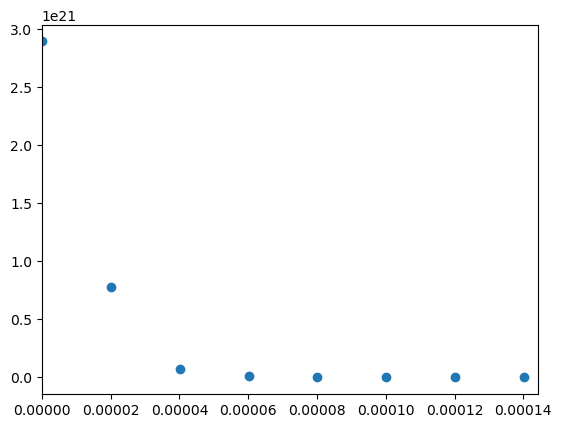

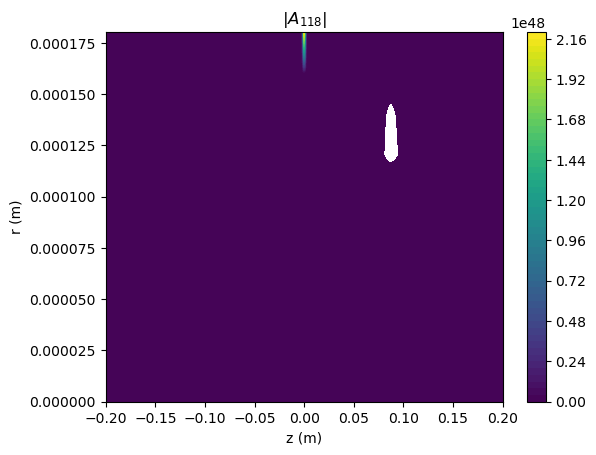

In [3]:
plt.scatter(r,sol.beam_118.data[:,500])
plt.show()
plt.scatter(r,sol.beam_118.data[:,950])
plt.xlim(0,4*omega0)
plt.show()


Z,R = np.meshgrid(z,r)
plt.contourf(Z,R,sol.beam_118.data,64)

plt.ylim(0,5*omega0)
plt.xlim(zstart,zstop)
plt.xlabel('z (m)')
plt.ylabel('r (m)')
plt.title("$|A_{118}|$")
plt.colorbar()
plt.show()

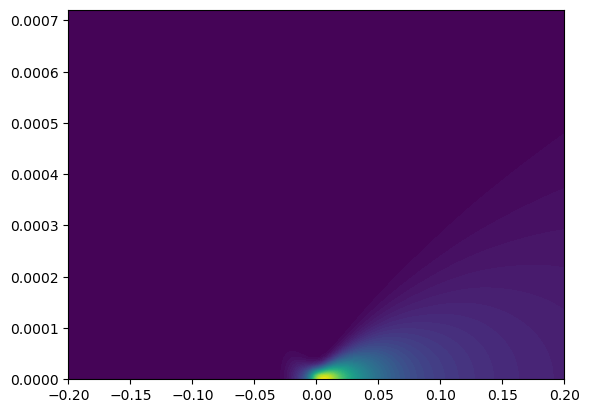

In [4]:
mag2 = np.array(np.zeros(len(z))) # values of the magnitude of J_3 for plotting, similar to phi3
r = np.linspace(0,20*omega0,100)
Z,R = np.meshgrid(z,r)
index=0
for num in z:
    mag2[index] = np.sqrt(ReJ3(num,zstart,2/b,params)**2+ImJ3(num,zstart,2/b,params)**2)
    index+=1

boyd118 = (1/2) * k118 * params['chi3'] * Torr_to_m3 *params['PXe'] * peak_amplitude_355(params) **3 \
* mag2 \
* omega0/beam_radius(Z,params)*np.exp(-3*R**2/beam_radius(Z,params)**2)

plt.contourf(Z,R,boyd118,64)

In [5]:
rstop = 6*omega0
r = np.linspace(0,rstop,10,dtype = np.longdouble)

sol_2 = solve_diff_eq(dA118_dz_GBNA,params,zrange, initial_vals,z,r)

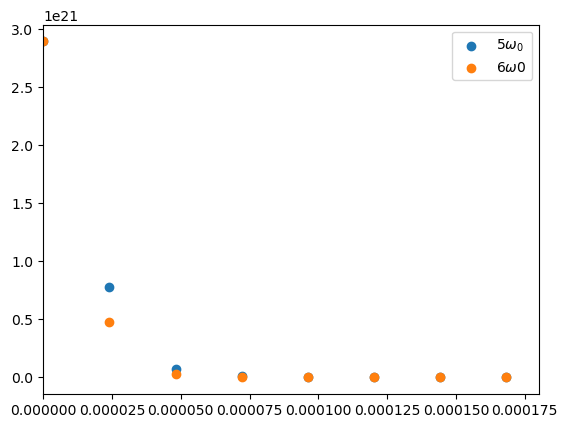

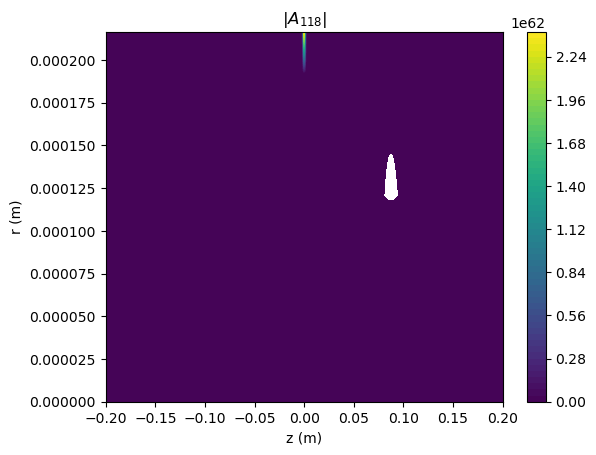

In [6]:
plt.scatter(r,sol.beam_118.data[:,950])

plt.xlim(0,5*omega0)
plt.scatter(r,sol_2.beam_118.data[:,950])
plt.legend(['$5 \omega_0$','$6 \omega0$'])
plt.show()

Z,R = np.meshgrid(z,r)
plt.contourf(Z,R,sol_2.beam_118.data,64)

plt.ylim(0,6*omega0)
plt.xlim(zstart,zstop)
plt.xlabel('z (m)')
plt.ylabel('r (m)')
plt.title("$|A_{118}|$")
plt.colorbar()
plt.show()


## Interpolation Hypothesis

In [7]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_0 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_0[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3_gauss_quad_complex(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_0)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=0')



In [8]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_4 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_4[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(4*omega0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3_gauss_quad_complex(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_4)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=4omega0')


In [9]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_0 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_0[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3_gauss_quad(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_0)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=0 with Gaussian Quadrature')



In [10]:
# chi3 = params['chi3']
# PXe = params['PXe'] * Torr_to_m3
# k118 = 2*np.pi/(118*10**(-9))
# b = params['b']

# RightTerm_4 = np.zeros(len(z))
# index = 0
# for zval in z:
#     RightTerm_4[index]= (1/2)*chi3*PXe*k118 * (amplitude_355(4*omega0,zval,params)**3) * np.cos((2*zval/b)-2*np.arctan2(2*zval/b,1)+phi3_gauss_quad(zval,zstart,2/b,params))
#     index += 1

# plt.plot(z,RightTerm_4)
# plt.xlabel('z')
# plt.ylabel('Right Term')
# plt.title('Right Term at r=4omega0 with Gaussian Quadrature')



In [11]:
# dk = 2/b
# ReJ3= np.zeros(len(z))
# index = 0
# for zval in z:
#     ReJ3[index]= ReJ3_gauss_quad(zval,zstart,dk,params)
#     index += 1

# ImJ3= np.zeros(len(z))
# index = 0
# for zval in z:
#     ImJ3[index]= ImJ3_gauss_quad(zval,zstart,dk,params)
#     index += 1    

In [12]:
# dk = 2/b
# plt.plot(z,evalRef(z,2/b,params))
# plt.title('$Ref(z)$')
# plt.show()
# plt.plot(z,ReJ3)
# plt.title('$ReJ_3$')
# plt.show()

# plt.plot(z,evalImf(z,2/b,params))
# plt.title('$Imf(z)$')
# plt.show()
# plt.title('$ImJ_3$')
# plt.plot(z,ImJ3)

## Cosine Term

### Arctan2

In [13]:

# Phi = np.zeros(len(z))
# index = 0
# for zval in z:
#     Phi[index]=phi3_gauss_quad(zval,zstart,2/b,params)
#     index += 1


In [14]:
# plt.plot(z,Phi)

In [15]:
# CosTerm = np.cos((2*z/b)-2*np.arctan2(2*z/b,1)+Phi)
# plt.plot(z,CosTerm)


### Arctan1

In [16]:

# Phi_arctan1 = np.zeros(len(z))
# index = 0
# for zval in z:
#     Phi_arctan1[index]=phi3_gauss_quad_arctan1(zval,zstart,2/b,params)
#     index += 1

In [17]:
# plt.plot(z,Phi_arctan1)

In [18]:
# CosTerm = np.cos((2*z/b)-2*np.arctan(2*z/b)+Phi_arctan1)
# plt.plot(z,CosTerm)


## Phase

In [19]:

# Phi_phase = np.zeros(len(z))
# index = 0
# for zval in z:
#     Phi_phase[index]=phi3_gauss_quad_phase(zval,zstart,2/b,params)
#     index += 1


In [20]:
# plt.plot(z,Phi_phase)

In [21]:
# CosTerm = np.cos((2*z/b)-2*np.arctan2(2*z/b,1)+Phi_phase)
# plt.plot(z,CosTerm)

## Complex Integral

In [22]:

# plt.plot(z,evalf(z,2/b,params)[0])

In [23]:

# Phi_complex = np.zeros(len(z))

# index = 0
# for zval in z:
#     Phi_complex[index]=phi3_gauss_quad_complex(zval,zstart,2/b,params)
#     index += 1

In [24]:
# plt.plot(z,Phi_complex)

In [25]:
# CosTerm = np.cos((2*z/b)-2*np.arctan2(2*z/b,1)+Phi_complex)
# plt.plot(z,CosTerm)
